In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/data/MovieLens/'


Mounted at /content/drive


In [ ]:
ratings = pd.read_csv(path + 'ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

movies = pd.read_csv(path + 'movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='latin-1')

users = pd.read_csv(path + 'users.dat', sep='::', engine='python',
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])



In [ ]:
# Display sample data
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# Check for missing values in each dataframe
print("Missing values in ratings:")
print(ratings.isnull().sum())

print("\nMissing values in movies:")
print(movies.isnull().sum())

print("\nMissing values in users:")
print(users.isnull().sum())


Missing values in ratings:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in movies:
MovieID    0
Title      0
Genres     0
dtype: int64

Missing values in users:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [ ]:
# Genres column has multiple genres per movie separated by |
from sklearn.preprocessing import MultiLabelBinarizer

# Split genres
movies['Genres'] = movies['Genres'].apply(lambda x: x.split('|'))

# Binarize
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(movies['Genres']),
                             columns=mlb.classes_,
                             index=movies.index)

# Concatenate back to movies
movies = pd.concat([movies.drop('Genres', axis=1), genre_encoded], axis=1)


In [ ]:
# Identify numerical columns in ratings dataframe
numerical_cols_ratings = ratings.select_dtypes(include=['int64', 'float64']).columns

print("Numerical columns in ratings dataframe:", numerical_cols_ratings)

# Apply IQR method to each numerical column in ratings dataframe
for col in numerical_cols_ratings:
    Q1 = ratings[col].quantile(0.25)
    Q3 = ratings[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ratings[(ratings[col] < lower_bound) | (ratings[col] > upper_bound)]

    print(f"\nOutliers in '{col}' column of ratings dataframe:")
    if outliers.empty:
        print("No outliers found.")
    else:
        print(outliers)

Numerical columns in ratings dataframe: Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

Outliers in 'UserID' column of ratings dataframe:
No outliers found.

Outliers in 'MovieID' column of ratings dataframe:
No outliers found.

Outliers in 'Rating' column of ratings dataframe:
         UserID  MovieID  Rating  Timestamp
148           2       21       1  978299839
180           2     3893       1  978299535
205           3     1261       1  978297663
249           4     3527       1  978294008
268           5     2916       1  978245645
...         ...      ...     ...        ...
1000171    6040     3388       1  956716407
1000177    6040     2751       1  956716438
1000185    6040     2794       1  956716438
1000187    6040     2003       1  956716294
1000204    6040     1091       1  956716541

[56174 rows x 4 columns]

Outliers in 'Timestamp' column of ratings dataframe:
         UserID  MovieID  Rating   Timestamp
2327         19      318       4   994556598
24

In [ ]:
# Identify numerical columns in ratings dataframe
numerical_cols_ratings = ratings.select_dtypes(include=['int64', 'float64']).columns

# Create a copy of the ratings dataframe to store the filtered data
ratings_filtered = ratings.copy()

# Apply IQR method to each numerical column in ratings dataframe and remove outliers
for col in numerical_cols_ratings:
    Q1 = ratings_filtered[col].quantile(0.25)
    Q3 = ratings_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    ratings_filtered = ratings_filtered[(ratings_filtered[col] >= lower_bound) & (ratings_filtered[col] <= upper_bound)]

    print(f"\nOutliers removed from '{col}' column of ratings dataframe.")

# Now, ratings_filtered contains the data without the identified outliers
print("\nShape of original ratings dataframe:", ratings.shape)
print("Shape of filtered ratings dataframe:", ratings_filtered.shape)


Outliers removed from 'UserID' column of ratings dataframe.

Outliers removed from 'MovieID' column of ratings dataframe.

Outliers removed from 'Rating' column of ratings dataframe.

Outliers removed from 'Timestamp' column of ratings dataframe.

Shape of original ratings dataframe: (1000209, 4)
Shape of filtered ratings dataframe: (892174, 4)


In [ ]:
movies.head()

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Labelencoding

le_gender = LabelEncoder()
users['Gender'] = le_gender.fit_transform(users['Gender'])  # M=1, F=0



In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [ ]:
# feature scaling

#ratings['Rating_norm'] = MinMaxScaler().fit_transform(ratings[['Rating']])

In [ ]:
#ratings.head()

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(stop_words='english')
#title_embeddings = tfidf.fit_transform(movies['Title'])


In [ ]:
#ratings['Rating_centered'] = ratings.groupby('UserID')['Rating'].transform(lambda x: x - x.mean())


# (EDA) Exploratory Data Analysis

In [ ]:
print("Shape of users:", users.shape)
print("\nusers summary:")
print(users.describe())

Shape of users: (6040, 5)

users summary:
            UserID       Gender          Age   Occupation
count  6040.000000  6040.000000  6040.000000  6040.000000
mean   3020.500000     0.717053    30.639238     8.146854
std    1743.742145     0.450468    12.895962     6.329511
min       1.000000     0.000000     1.000000     0.000000
25%    1510.750000     0.000000    25.000000     3.000000
50%    3020.500000     1.000000    25.000000     7.000000
75%    4530.250000     1.000000    35.000000    14.000000
max    6040.000000     1.000000    56.000000    20.000000


In [ ]:
# Number of unique users and items
n_users = ratings['UserID'].nunique()
n_items = ratings['MovieID'].nunique()
print(f"\nNumber of unique users: {n_users}")
print(f"Number of unique movies: {n_items}")


Number of unique users: 6040
Number of unique movies: 3706


<ipython-input-35-202887bc42a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='Rating', palette='coolwarm')


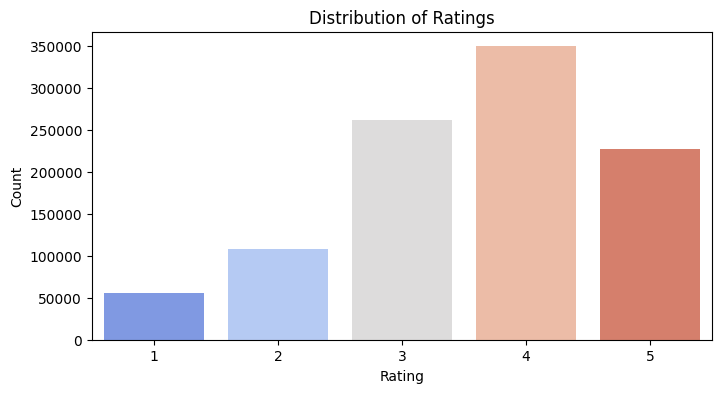

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ratings count
plt.figure(figsize=(8, 4))
sns.countplot(data=ratings, x='Rating', palette='coolwarm')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


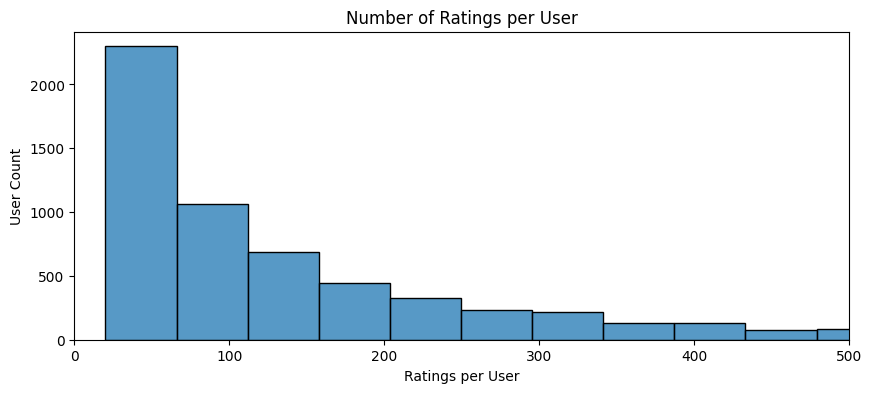

In [ ]:
# Number of ratings per user
ratings_per_user = ratings.groupby('UserID')['Rating'].count()

plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("User Count")
plt.xlim(0, 500)  # Adjust for better readability
plt.show()

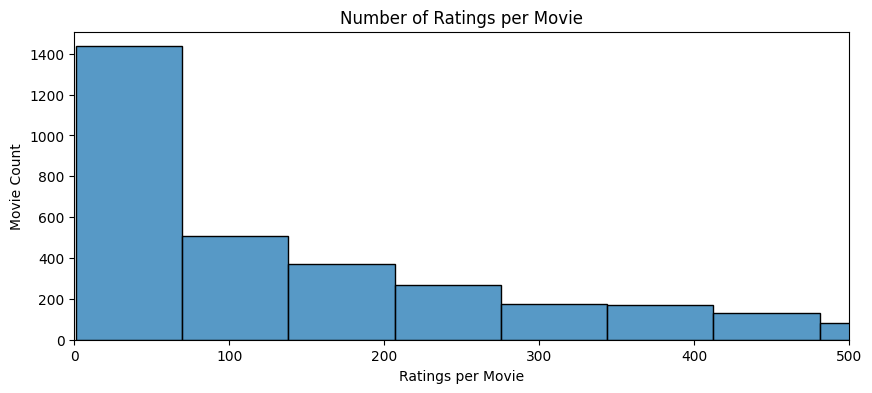

In [ ]:
# Number of ratings per movie
ratings_per_movie = ratings.groupby('MovieID')['Rating'].count()

plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings per Movie")
plt.ylabel("Movie Count")
plt.xlim(0, 500)
plt.show()

<ipython-input-38-51be4e0e65fd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='RatingCount', y='Title', palette='viridis')


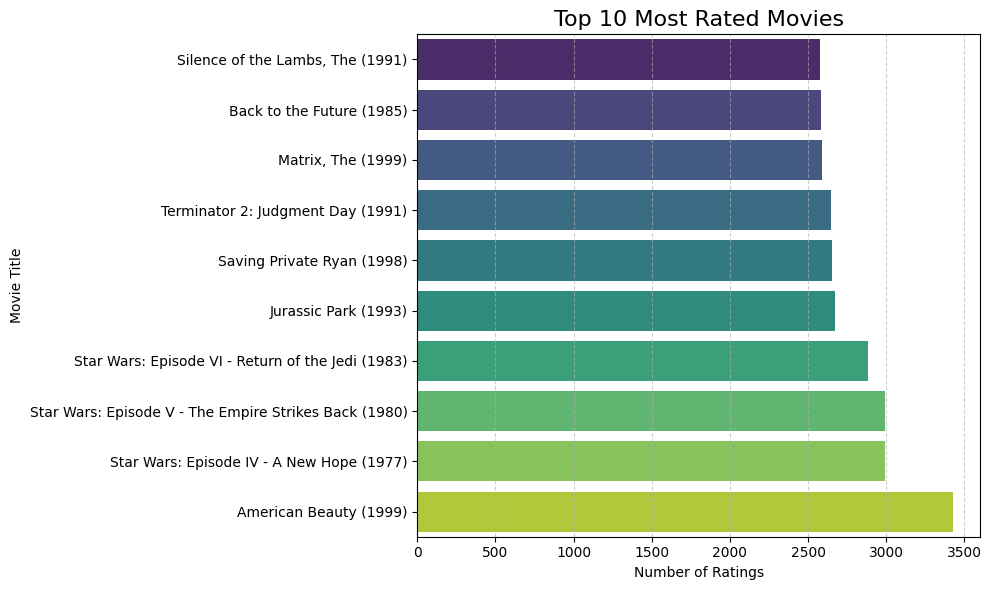

In [ ]:
# Get top 10 most rated movies
top_movies = ratings['MovieID'].value_counts().head(10).reset_index()
top_movies.columns = ['MovieID', 'RatingCount']

# Merge with movie titles
top_movies = top_movies.merge(movies[['MovieID', 'Title']], on='MovieID', how='left')

# Sort for better visual appearance
top_movies = top_movies.sort_values(by='RatingCount', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='RatingCount', y='Title', palette='viridis')

plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.grid(axis='x',linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-39-64100cc563c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='RatingCount', y='UserID', palette='magma')


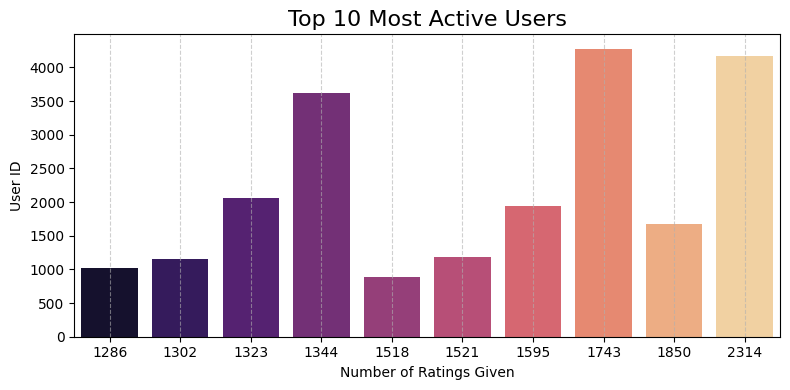

In [ ]:
# Get top 10 most active users (most ratings given)
top_users = ratings['UserID'].value_counts().head(10).reset_index()
top_users.columns = ['UserID', 'RatingCount']

# Sort for cleaner visual (low to high)
top_users = top_users.sort_values(by='RatingCount', ascending=True)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=top_users, x='RatingCount', y='UserID', palette='magma')

plt.title('Top 10 Most Active Users', fontsize=16)
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
